In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

In [2]:
data = np.array([1,0,0,1,0,0,1,0,0,0])

In [3]:
data

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [11]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
#     step = pm.Metropolis()
    trace = pm.sample(1000, random_seed=123)
# https://docs.pymc.io/en/v3/api/inference.html
# 기본적으로 각 chain 별로 1000개가 추출됨 (이는 사용되지는 않음)

C:\Users\user\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [theta]
>NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


In [21]:
list(trace)

[{'theta_logodds__': -1.991136812515394, 'theta': 0.12013664512811625},
 {'theta_logodds__': -2.657017145000982, 'theta': 0.06555782649242092},
 {'theta_logodds__': -1.8433460339482926, 'theta': 0.13665604341817586},
 {'theta_logodds__': -0.815197958213009, 'theta': 0.30678394977414863},
 {'theta_logodds__': -1.1498961804967904, 'theta': 0.24050804661805233},
 {'theta_logodds__': -2.1115596552612135, 'theta': 0.10797835041020633},
 {'theta_logodds__': -0.8406815688592216, 'theta': 0.30139125713821685},
 {'theta_logodds__': -0.7812633559793412, 'theta': 0.31404766781648424},
 {'theta_logodds__': -0.6945523256099269, 'theta': 0.333021152039147},
 {'theta_logodds__': -0.6150577375657401, 'theta': 0.3509063246947487},
 {'theta_logodds__': -0.6150577375657401, 'theta': 0.3509063246947487},
 {'theta_logodds__': 0.39824684244636005, 'theta': 0.5982663723900141},
 {'theta_logodds__': 0.55512779909797, 'theta': 0.6353244592616171},
 {'theta_logodds__': -1.9291414413455266, 'theta': 0.1268456400

C:\Users\user\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>]], dtype=object)

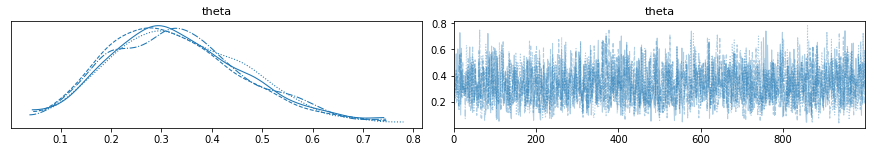

In [12]:
az.plot_trace(trace)

<AxesSubplot: title={'center': 'theta'}>

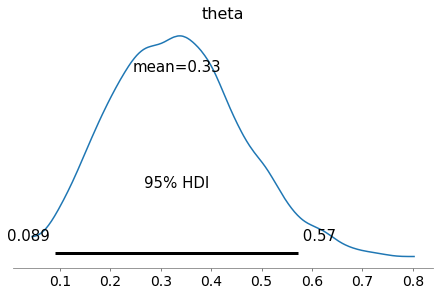

In [12]:
az.plot_posterior(trace, hdi_prob=0.95)

In [14]:
az.summary(trace, kind="stats")

,mean,sd,hdi_3%,hdi_97%
theta,0.332,0.128,0.089,0.556


In [13]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.Metropolis() # 메트로폴리스 방법 사용
    trace_MP = pm.sample(1000, step, random_seed=123)

C:\Users\user\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


C:\Users\user\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>]], dtype=object)

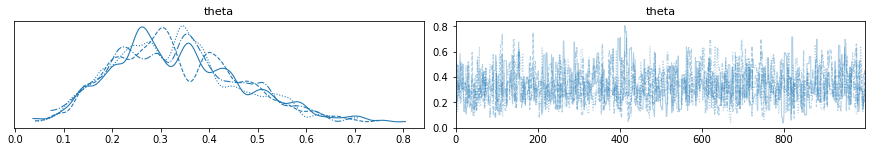

In [14]:
az.plot_trace(trace_MP)

C:\Users\user\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot: title={'center': 'theta'}>

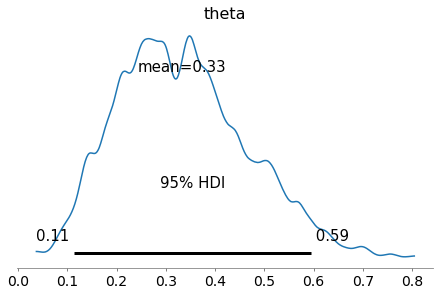

In [15]:
az.plot_posterior(trace_MP, hdi_prob=0.95)

In [19]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.HamiltonianMC()
    trace_HMC = pm.sample(1000, step, random_seed=123)

C:\Users\user\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


C:\Users\user\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot: title={'center': 'theta'}>,
        <AxesSubplot: title={'center': 'theta'}>]], dtype=object)

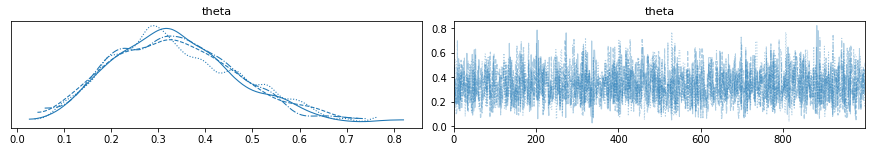

In [20]:
az.plot_trace(trace_HMC)

C:\Users\user\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot: title={'center': 'theta'}>

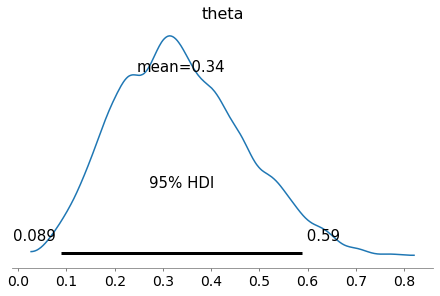

In [21]:
az.plot_posterior(trace_HMC, hdi_prob=0.95)